In [2]:
## By A. Zandi; HWK3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()

In [34]:
## Reading it in, keeping only volume
kirb21_df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")
kirb21_df["rawid"] = kirb21_df["rawid"].astype(str)
selected_rawid = "kirby906a_ax.img" 
kirby906a_ax_df = kirb21_df[kirb21_df["rawid"] == selected_rawid ]
kirby906a_ax_df.head(6)

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
12540,12541,kirby906a_ax.img,Telencephalon_L,467063,2.0,350.0,165.2599,57.1707,1,1,906,1195015,1123076
12541,12542,kirby906a_ax.img,Telencephalon_R,470488,2.0,337.0,171.8695,59.3001,1,1,906,1195015,1123076
12542,12543,kirby906a_ax.img,Diencephalon_L,8801,60.0,327.0,227.1878,31.2303,1,1,906,1195015,1123076
12543,12544,kirby906a_ax.img,Diencephalon_R,9054,63.0,415.0,231.6770,31.1780,1,1,906,1195015,1123076
12544,12545,kirby906a_ax.img,Mesencephalon,9564,86.0,352.0,269.1003,28.6454,1,1,906,1195015,1123076
12545,12546,kirby906a_ax.img,Metencephalon,154071,4.0,349.0,171.7107,55.0005,1,1,906,1195015,1123076


In [38]:
## Extract the Type 1 Level 1 data
## The .loc[] method selects rows based on labels or boolean conditions.
t1l1 = kirby906a_ax_df.loc[(df.type == 1) & (df.level == 2)]

In [36]:
## create a composition variable
t1l1 = t1l1.assign(comp = t1l1.volume / t1l1.tbv)
t1l1 = t1l1.loc[t1l1.roi != 'CSF']
## get the mean of the composition variable across
## subjects by ROI
summary = t1l1[['roi', 'comp']].groupby('roi', as_index=False).mean()
print(summary)

               roi      comp
0   Diencephalon_L  0.007837
1   Diencephalon_R  0.008062
2    Mesencephalon  0.008516
3    Metencephalon  0.137187
4   Myelencephalon  0.003593
5  Telencephalon_L  0.415878
6  Telencephalon_R  0.418928


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Diencephalon_L'),
  Text(1, 0, 'Diencephalon_R'),
  Text(2, 0, 'Mesencephalon'),
  Text(3, 0, 'Metencephalon'),
  Text(4, 0, 'Myelencephalon'),
  Text(5, 0, 'Telencephalon_L'),
  Text(6, 0, 'Telencephalon_R')])

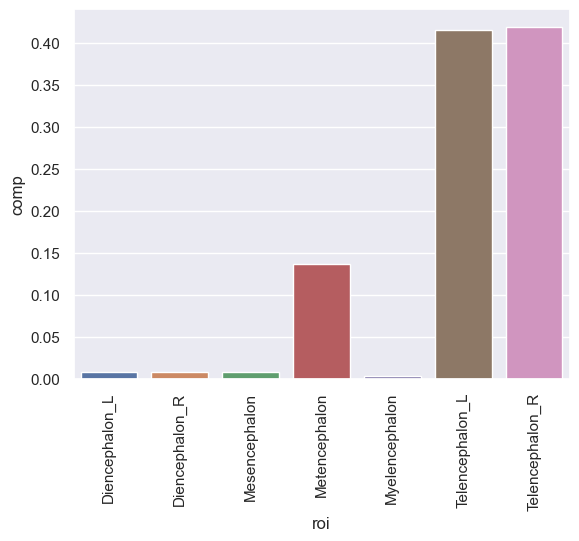

In [37]:
g = sns.barplot(x='roi', y = 'comp', data = summary)
## this is the matplotlib command for rotating 
## axis tick labels by 90 degrees.
plt.xticks(rotation = 90)

In [43]:
## Extract the Type 1 Level 2 data
ll_regions_df = df.loc[(df.type == 1) & (df.level == 2)]

In [42]:
## create a composition variable
ll_regions_df = ll_regions_df.assign(comp = t1l1.volume / t1l1.tbv)
## subjects by ROI
summary = ll_regions_df[['roi', 'comp']].groupby('roi', as_index=False).mean()
print(summary)

                 roi      comp
0   BasalForebrain_L  0.002485
1   BasalForebrain_R  0.002431
2   CerebralCortex_L  0.220002
3   CerebralCortex_R  0.222423
4    CerebralNucli_L  0.010466
5    CerebralNucli_R  0.010954
6    Mesencephalon_L  0.004315
7    Mesencephalon_R  0.004332
8    Metencephalon_L  0.061913
9    Metencephalon_R  0.062970
10  Myelencephalon_L  0.001791
11  Myelencephalon_R  0.001993
12          Sulcus_L  0.028775
13          Sulcus_R  0.025055
14        Thalamus_L  0.005078
15        Thalamus_R  0.005203
16         Ventricle  0.019879
17     WhiteMatter_L  0.189838
18     WhiteMatter_R  0.193806


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'BasalForebrain_L'),
  Text(1, 0, 'BasalForebrain_R'),
  Text(2, 0, 'CerebralCortex_L'),
  Text(3, 0, 'CerebralCortex_R'),
  Text(4, 0, 'CerebralNucli_L'),
  Text(5, 0, 'CerebralNucli_R'),
  Text(6, 0, 'Mesencephalon_L'),
  Text(7, 0, 'Mesencephalon_R'),
  Text(8, 0, 'Metencephalon_L'),
  Text(9, 0, 'Metencephalon_R'),
  Text(10, 0, 'Myelencephalon_L'),
  Text(11, 0, 'Myelencephalon_R'),
  Text(12, 0, 'Sulcus_L'),
  Text(13, 0, 'Sulcus_R'),
  Text(14, 0, 'Thalamus_L'),
  Text(15, 0, 'Thalamus_R'),
  Text(16, 0, 'Ventricle'),
  Text(17, 0, 'WhiteMatter_L'),
  Text(18, 0, 'WhiteMatter_R')])

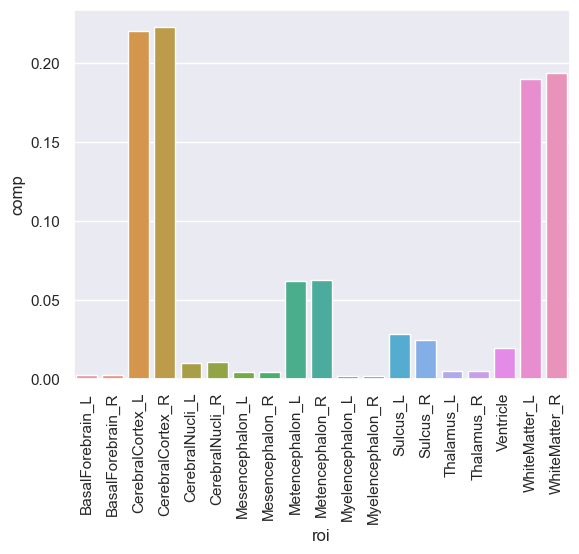

In [44]:
g = sns.barplot(x='roi', y = 'comp', data = summary)
## this is the matplotlib command for rotating 
## axis tick labels by 90 degrees.
plt.xticks(rotation = 90)

In [45]:
## Extract the Type 1 Level 3 data
l2_regions_df = df.loc[(df.type == 1) & (df.level == 3)]

In [49]:
plt.figure(figsize=(8, 8))
##colors = sns.color_palette("pastel")  # Use Seaborn color palette

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

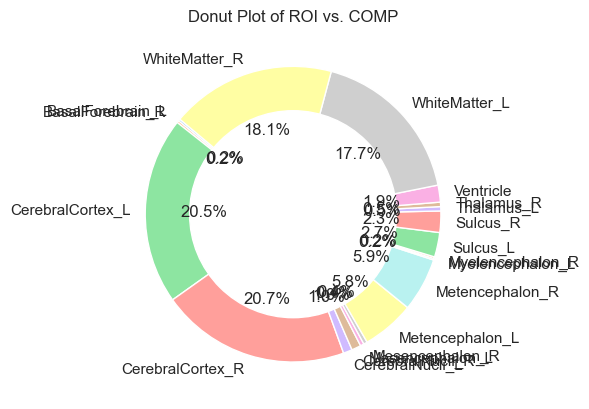

In [48]:
plt.pie(summary['comp'], labels=summary['roi'], autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'white'}, startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Donut Plot of ROI vs. COMP")
plt.show()

In [61]:
## New reading ; class data
url = "https://raw.githubusercontent.com/bcaffo/ds4ph-bme/refs/heads/master/data/classInterests.txt"
class_interests_df = pd.read_csv(url, sep="\t")  # Specify tab as the delimiter
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_colwidth", None)  # Show full text in columns
print(class_interests_df)

         Year            Program
0    Master's                BME
1    Master's                BME
2      Senior                BME
3         PhD                BME
4         PhD   Computer_Science
5    Master's                BME
6    Master's                BME
7    Master's                BME
8    Master's                BME
9    Master's                BME
10   Master's                BME
11   Master's                BME
12   Master's                BME
13   Master's                BME
14     Junior                BME
15   Master's                BME
16   Master's  Materials_Science
17   Master's                BME
18   Master's                BME
19     Senior             ChemBE
20   Master's                BME
21  Sophomore                BME
22     Junior                BME
23   Master's                BME
24   Master's                BME
25   Master's                BME
26  Sophomore                BME
27   Master's             ChemBE
28   Master's          JHSPH-MMI
29        

       year  program
0      Year  Program
1  Master's      BME
2  Master's      BME
3    Senior      BME
4       PhD      BME


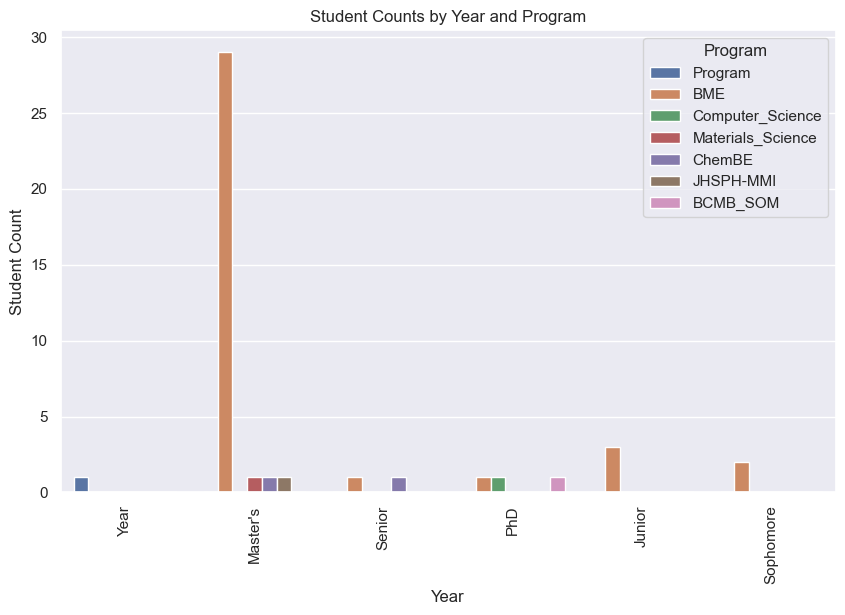

In [68]:
class_interests_df = pd.read_csv(url, sep="\t", header=None, names=["year", "program"])
print(class_interests_df.head())
class_interests_df["year"] = class_interests_df["year"].astype(str)
plt.figure(figsize=(10, 6))
sns.countplot(x="year", hue="program", data=class_interests_df)
plt.xlabel("Year")
plt.ylabel("Student Count")
plt.title("Student Counts by Year and Program")
plt.xticks(rotation=90)
plt.legend(title="Program")
plt.show()

In [77]:
## New reading ; Genetic data
url = "https://raw.githubusercontent.com/jhu-advdatasci/2018/refs/heads/master/data/GSE5859_exprs.csv"
gene_expression_df = pd.read_csv(url, index_col=0)

# Subtract the row mean from each row
gene_expression_df_pt1 = gene_expression_df.sub(gene_expression_df.mean(axis=1), axis=0)

# Subtract the column mean from each column
gene_expression_df_pt2 = gene_expression_df_pt1.sub(gene_expression_df_pt1.mean(axis=0), axis=1)

# Divide each column by the column's standard deviation
gene_expression_df_pt3 = gene_expression_df_pt2.div(gene_expression_df_pt2.std(axis=0), axis=1)
gene_expression_df_pt3.columns = gene_expression_df.columns
gene_expression_df_pt3.index = gene_expression_df.index

# Display the first few rows to verify column labels
print(gene_expression_df_pt3.head(2))


           GSM25581.CEL.gz  GSM25681.CEL.gz  GSM136524.CEL.gz  \
1007_s_at        -0.062810        -1.694428         -0.797346   
1053_at           0.484259         0.835005          1.434085   

           GSM136707.CEL.gz  GSM25553.CEL.gz  GSM136676.CEL.gz  \
1007_s_at          0.362538        -1.152413          0.366177   
1053_at           -0.316432         0.141554         -0.076237   

           GSM136711.CEL.gz  GSM136542.CEL.gz  GSM136535.CEL.gz  \
1007_s_at          1.252187         -0.054154          1.008166   
1053_at           -0.745136         -0.148166         -0.250652   

           GSM25399.CEL.gz  GSM25552.CEL.gz  GSM25542.CEL.gz  \
1007_s_at        -0.730639        -0.273332         0.322082   
1053_at          -0.497815         0.849053        -2.349403   

           GSM136544.CEL.gz  GSM25662.CEL.gz  GSM136563.CEL.gz  \
1007_s_at          0.034562         0.588650          0.789357   
1053_at            1.213631         0.724799         -0.285589   

           

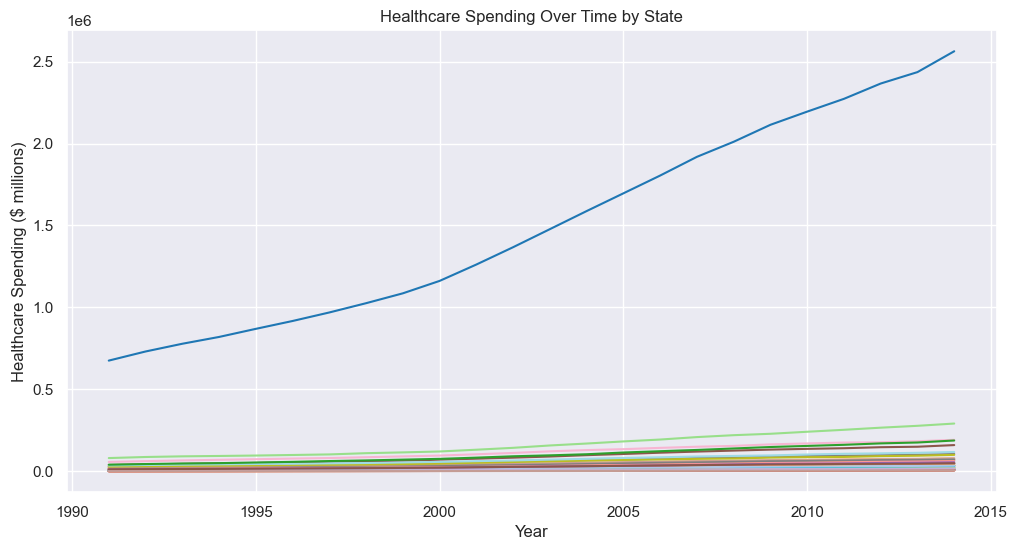

In [92]:
## New reading ; Healtcare data
url = "https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv"
healthcare_df = pd.read_csv(url, skiprows=2)  # Skip metadata lines

# Rename 'Location' to 'State' for clarity
healthcare_df.rename(columns={"Location": "State"}, inplace=True)

# Reshape the dataset to long format for time-series visualization
healthcare_melted = healthcare_df.melt(id_vars=["State"], var_name="Year", value_name="Spending")

# Convert 'Year' to numeric format for proper plotting
healthcare_melted["Year"] = healthcare_melted["Year"].str.extract("(\d{4})")  # Extract year values
healthcare_melted["Year"] = pd.to_numeric(healthcare_melted["Year"], errors="coerce")
healthcare_melted["Spending"] = pd.to_numeric(healthcare_melted["Spending"], errors="coerce")

# Plot Healthcare Spending Over Time by State
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Spending", hue="State", data=healthcare_melted, legend=False, palette="tab20")
plt.xlabel("Year")
plt.ylabel("Healthcare Spending ($ millions)")
plt.title("Healthcare Spending Over Time by State")
plt.grid(True)
plt.show()


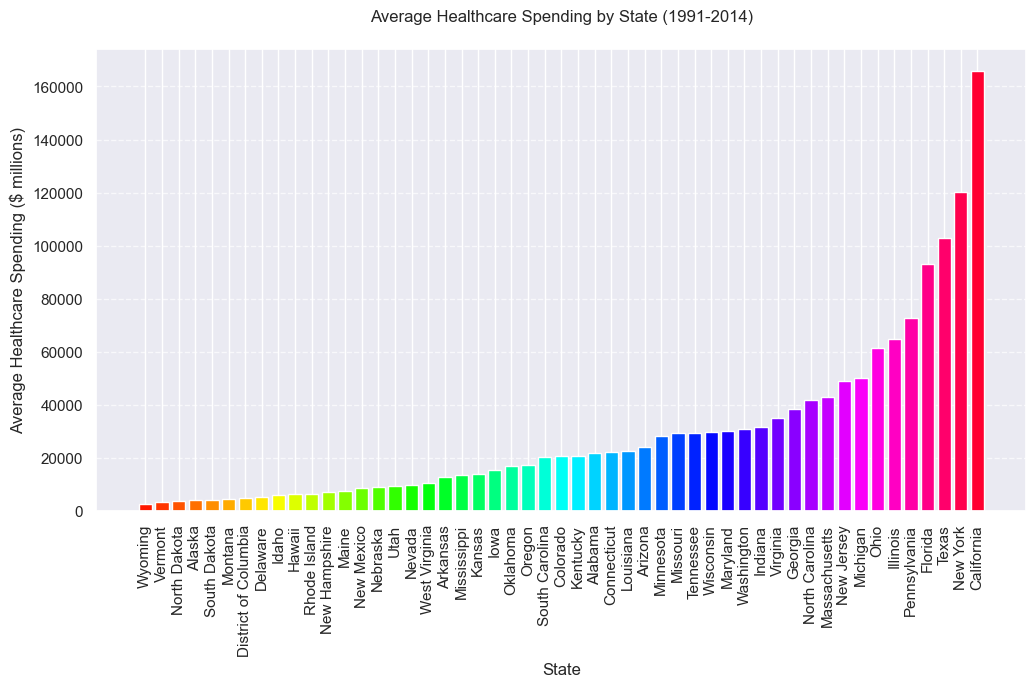

In [110]:
# Do the BAR plot

# Convert all year columns to numeric for proper calculations
year_columns = healthcare_df.columns[1:]  # All columns except 'State'
healthcare_df[year_columns] = healthcare_df[year_columns].apply(pd.to_numeric, errors="coerce")

# Remove rows with null (NaN) values
healthcare_df = healthcare_df.dropna()

# Compute the average healthcare spending by state
avg_spending_by_state = healthcare_df.set_index("State").mean(axis=1).sort_values()

# Convert state names to strings (Fix TypeError issue)
states = avg_spending_by_state.index.astype(str)
spending_values = avg_spending_by_state.values

# Create a bar plot of average healthcare spending by state with distinct colors
plt.figure(figsize=(12, 6))
colors = sns.color_palette("hsv", len(states))  # Assign different colors for each bar
plt.bar(states, spending_values, color=colors)

#  plot
plt.xlabel("State")
plt.ylabel("Average Healthcare Spending ($ millions)")
plt.title("Average Healthcare Spending by State (1991-2014)", loc="center", pad=20)  # Center-align title
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

